<a href="https://colab.research.google.com/github/spurdue11/plots_for_chem_lit/blob/main/PlotsChemLit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
from scipy.special import comb

In [2]:
!git clone https://github.com/spurdue11/plots_for_chem_lit

Cloning into 'plots_for_chem_lit'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


# Notes on making plots


* If you want a complete list of possible marker codes, visit https://matplotlib.org/3.3.3/api/markers_api.html.

# Customers

In [11]:
data = pd.read_csv("plots_for_chem_lit/fig511_data.csv")
data['constant'] = data['Pv (bar)']*np.exp(data['L (kJ/mol)']*1000/(data['T (C)']+273)/8.314)
data

,T (C),Pv (bar),L (kJ/mol),constant
0,-40.00,0.00013,51.16,3.833188e+07
1,-20.00,0.00103,51.13,3.711683e+07
2,0.00,0.00611,51.07,3.613326e+07
3,0.01,0.00612,45.05,2.549290e+06
4,25.00,0.03170,43.99,1.629604e+06
5,50.00,0.12340,42.92,1.077621e+06
6,100.00,1.01300,40.66,5.009691e+05
7,150.00,4.75700,38.09,2.404863e+05
8,200.00,15.54000,34.96,1.128017e+05
9,250.00,39.74000,30.90,4.847052e+04


In [25]:
from scipy.constants import R

In [32]:
constant = np.mean(data['constant'][2:6])
L = np.mean(data['L (kJ/mol)'][2:6])
constant

10347444.658679893

In [27]:
df = pd.DataFrame()
df['T'] = np.linspace(0,40,41)
df['P'] = constant*np.exp(-L*1000/R/(df['T']+273))

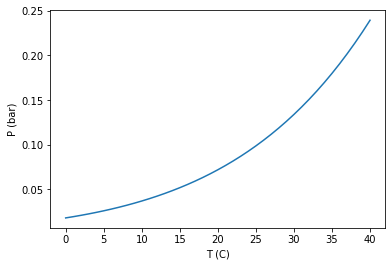

In [29]:


fig, ax = plt.subplots()
ax.plot(df['T'], df['P'])

# ax.plot(data['Month'], data[' north branch'], label="North branch");
ax.set_xlabel("T (C)");
ax.set_ylabel("P (bar)");
# plt.xticks(rotation = 45);
# ax.legend();

In [30]:
fig.savefig('p.pdf', dpi=300, bbox_inches='tight')

# Energy states

In [ ]:
energy = pd.read_excel("plots_for_chem_lit/energy-states.xlsx")
energy.head()

,computational method,energy of state 1,energy of state 2,95% CI
0,RRKM,14.65000,17.5500,1.10
1,abbreviated version 1,13.10000,17.1000,1.15
2,abbreviated version 2,12.12883,16.9531,1.08
3,abbreviated version 3,12.95600,18.4560,1.65
4,ab initio,12.98470,19.4589,0.85


# Luciferase

In [ ]:
luciferase = pd.read_excel("plots_for_chem_lit/luciferase.xlsx")
luciferase.head()

,experiment type,p53 type,luciferase act 1,luciferase act 2,luciferase act 3
0,untreated,pos,25.0,24.5,25.2
1,untreated,neg,24.8,24.9,25.1
2,IFN,pos,65.0,64.0,67.0
3,IFN,neg,62.0,63.0,59.0
4,dsRNA,pos,75.0,75.0,76.0


# Phenotype data

In [ ]:
phenA = pd.read_excel("plots_for_chem_lit/phenotypeA.xlsx")
phenA.head()

,Subject,phenotype A
0,Subject 1,257
1,subject 2,258
2,Subject 3,259
3,Subject 4,261
4,Subject 5,261


In [ ]:
phenB = pd.read_excel("plots_for_chem_lit/phenotypeB.xlsx")
phenB.head()

,Subject,phenotype B
0,Subject 1,219
1,subject 2,247
2,Subject 3,248
3,Subject 4,249
4,Subject 5,250


In [ ]:
A = "A (N = " + str(len(phenA['phenotype A'])) + ")"
B = "B (N = " + str(len(phenB['phenotype B'])) + ")"
phen_n = [round(np.mean(phenA['phenotype A'])), round(np.mean(phenB['phenotype B']))]
phen_axis = [A,B]

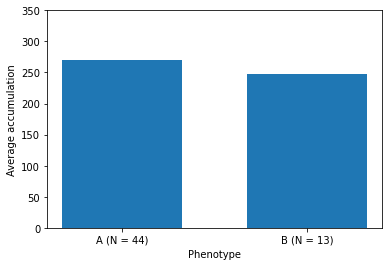

In [ ]:
fig, ax = plt.subplots()
ax.bar(phen_axis,phen_n,width=.65);
ax.set_xlabel("Phenotype");
ax.set_ylabel("Average accumulation");
ax.set_yticks(np.arange(0, 351, 50));